In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from gfe_estimation import estimate_grouped_fixed_effect_model_parameters
from simulate import *
from simulation_plot import *

# ToDo

- Save figures for comparison.
- Make a table.
- Report CI.

# Simulation Strategy for increasing N

$y_{it} = x_{it}'\theta + \alpha_{g_it} + \upsilon_{it}$


For independent individuals i= 1,...,N=10, 100, 1000, 100000 with g=1,G=2 distict grouping over time t=1,...,T=2

- simulate p=2 independent covariates $x_{itp} \sim Unif(-15,15)$ 
- simulate $\upsilon_{it} \sim \mathcal{N}(0, \sigma^2)$

with parameters:

- $ \alpha = \begin{pmatrix} 5 \\ 20 \\ 15 \\ 50
\end{pmatrix}$




- $ \theta =  \begin{pmatrix} 0.1 \\ 0.5 \end{pmatrix}$



For starting values I can take a random value from the X and ys

In [2]:
colors = ['#547482','#C87259','#C2D8C2','#F1B05D','#818662','#6C4A4D','#7A8C87','#EE8445','#C8B05C','#3C2030','#C89D64','#2A3B49']

In [213]:
deneme = {"nfeatures" : 2,
        "ngroups" : 2,
                   "specified_ngroups": 2,
                   "nperiods" : 2,
                   "theta" : np.array([0.1, 0.5]),
                   "alpha" : np.array([5, 20 ,15, 50]),
                   "theta_0" : np.array([0.05,0.3]),
                   "alpha_0" : np.array([3, 15 , 10, 40]),
                   "low" : -15,
                   "up" : 15,
                   "nreps" : 1000,
                   "seed" : 1}

In [218]:
dene = monte_carlo_simulation(nindividuals=100, **deneme)

In [221]:
params_n = {"n=10": {"nindividuals" : 10,
                   "nfeatures" : 2,
                   "ngroups" : 2,
                   "specified_ngroups": 2,
                   "nperiods" : 2,
                   "theta" : np.array([0.1, 0.5]),
                   "alpha" : np.array([5, 20 ,15, 50]),
                   "theta_0" : np.array([0.05,0.3]),
                   "alpha_0" : np.array([3, 15 , 10, 40]),
                   "low" : -15,
                   "up" : 15,
                   "nreps" : 1000,
                   "seed" : 1},
          
          "n=100": {"nindividuals" : 100,
                    "nfeatures" : 2,
                    "ngroups" : 2,
                    "specified_ngroups": 2,
                    "nperiods" : 2,
                    "theta" : np.array([0.1,0.5]),
                    "alpha" : np.array([5, 20, 15, 50]),
                    "theta_0" : np.array([0.05,0.3]),
                    "alpha_0" : np.array([3, 15, 20, 10]),
                    "low" : -15,
                    "up" : 15,
                    "nreps" : 1000,
                    "seed" : 1},
          
          "n=1000": {"nindividuals" : 1000,
                     "nfeatures" : 2,
                     "ngroups" : 2,
                     "specified_ngroups": 2,
                     "nperiods" : 2,
                     "theta" : np.array([0.1,0.5]),
                     "alpha" : np.array([5, 20 , 15, 50]),
                    "theta_0" : np.array([0.05,0.3]),
                    "alpha_0" : np.array([3, 15 , 10, 40]),
                     "low" : -15,
                     "up" : 15,
                     "nreps" : 1000,
                     "seed" : 1},
          
        "n=10000": {"nindividuals" : 10000,
                    "nfeatures" : 2,
                    "ngroups" : 2,
                    "specified_ngroups": 2,
                    "nperiods" : 2,
                    "theta" : np.array([0.1,0.5]),
                    "alpha" : np.array([5, 20 , 15, 50]),
                    "theta_0" : np.array([0.05,0.3]),
                    "alpha_0" : np.array([3, 15 , 10, 40]),
                    "low" : -15,
                    "up" : 15,
                    "nreps" : 1000,
                    "seed" : 1}}

In [6]:
estimates_n10 = monte_carlo_simulation(**params_n["n=10"])
realizations_n10 = pd.DataFrame(estimates_n10,  columns = ['theta_1_hat', 'theta_2_hat', 'alpha_11_hat', 'alpha_12_hat', 
                                                                  'alpha_21_hat', 'alpha_22_hat'])

In [11]:
realizations_n10.mean() #Expected value

theta_1_hat      0.101051
theta_2_hat      0.499709
alpha_11_hat     4.999660
alpha_12_hat    19.993460
alpha_21_hat    15.016048
alpha_22_hat    50.021782
dtype: float64

In [13]:
realizations_n10.var() #Variance

theta_1_hat     0.000936
theta_2_hat     0.001016
alpha_11_hat    0.234892
alpha_12_hat    0.235984
alpha_21_hat    0.220804
alpha_22_hat    0.232239
dtype: float64

# MSE 

In [94]:
def mse(realizations, true_value, size):
    return ((realizations - true_value)**2).sum()/(size-1)

In [81]:
true_value = np.array([0.1, 0.5, 5, 20, 15, 50])

In [106]:
def ci(realizations, sample_size, critical_value=1.96):
    ci = [realizations.mean() - (critical_value*np.sqrt(realizations.var())/np.sqrt(sample_size)), 
          realizations.mean() + (critical_value*np.sqrt(realizations.var())/np.sqrt(sample_size))]
    return ci

In [107]:
def table(realizations, sample_size, true_value, nreps, critical_value):
    return pd.DataFrame({'true_value': true_value, 'mean': realizations.mean(), 'variance': realizations.var(), 
                         'MSE': mse(realizations, true_value, nreps),
                         'CI lower bound':ci(realizations, sample_size, critical_value)[0],
                         'CI upper bound':ci(realizations, sample_size, critical_value)[1],
                         '% of realizations in CI':(((ci(realizations, sample_size, critical_value)[0]<=realizations)&
                                                     (ci(realizations, sample_size, critical_value)[1]>=realizations))*1).mean(),
                         'coverage probability': (((ci(realizations, sample_size, critical_value)[0]<=true_value)&
                                                   (ci(realizations, sample_size, critical_value)[1]>=true_value))*1).mean()
                        })

In [109]:
df = table(realizations_n10, 10, true_value, 1000, 1.96)

In [105]:
ci(realizations_n10, 10, 1.96)[0]

,theta_1_hat,theta_2_hat,alpha_11_hat,alpha_12_hat,alpha_21_hat,alpha_22_hat
0,-4.380364,-3.890024,0.314264,15.085293,10.044532,45.113776
1,-4.315808,-3.899622,0.727428,15.958314,10.347903,45.616289
2,-4.305142,-3.921228,1.419102,15.611702,10.234470,45.742743
3,-4.302133,-3.889581,0.945219,15.322449,11.001777,45.752240
4,-4.312925,-3.951018,0.596080,15.535435,10.134927,45.177780
...,...,...,...,...,...,...
995,-4.347764,-3.957207,0.803639,15.949643,10.692295,45.512424
996,-4.361067,-3.930883,0.319685,15.459997,10.397637,45.443888
997,-4.290900,-3.933459,0.443926,15.164352,10.430464,44.965433
998,-4.307149,-3.877866,0.539356,16.043927,9.835174,45.734861


In [115]:
df.index.name = 'parameter'
df

,mean,variance,MSE,CI lower bound,CI upper bound,% of realizations in CI,coverage probability
parameter,,,,,,,
theta_1_hat,0.101051,0.000936,0.000937,0.082092,0.120010,0.484,1.0
theta_2_hat,0.499709,0.001016,0.001016,0.479948,0.519469,0.487,1.0
alpha_11_hat,4.999660,0.234892,0.234892,4.699267,5.300053,0.490,1.0
alpha_12_hat,19.993460,0.235984,0.236027,19.692369,20.294551,0.464,1.0
alpha_21_hat,15.016048,0.220804,0.221062,14.724802,15.307293,0.480,1.0
alpha_22_hat,50.021782,0.232239,0.232714,49.723090,50.320474,0.463,1.0


In [99]:
coverage = ((interval[0]<=true_value)&(interval[1]>=true_value))*1
coverage.mean()

1.0

In [93]:
((realizations_n10 - true_value)**2).sum()

theta_1_hat       0.935798
theta_2_hat       1.015478
alpha_11_hat    234.657116
alpha_12_hat    235.791092
alpha_21_hat    220.840627
alpha_22_hat    232.481214
dtype: float64

In [95]:
mse(realizations_n10, true_value, 1000)

theta_1_hat     0.000937
theta_2_hat     0.001016
alpha_11_hat    0.234892
alpha_12_hat    0.236027
alpha_21_hat    0.221062
alpha_22_hat    0.232714
dtype: float64

In [28]:
sum((realizations_n10.iloc[:,0] - 0.1)**2)/999

0.0009367350796280543

In [29]:
sum((realizations_n10.iloc[:,1] - 0.5)**2)/999

0.0010164945742619452

In [30]:
sum((realizations_n10.iloc[:,2] - 5)**2)/999

0.2348920077792793

In [31]:
sum((realizations_n10.iloc[:,3] - 20)**2)/999

0.2360271189423697

In [32]:
sum((realizations_n10.iloc[:,4] - 15)**2)/999

0.22106168864785092

In [33]:
sum((realizations_n10.iloc[:,5] - 50)**2)/999

0.23271392832331275

In [69]:
def ci(mean, variance, sample_size, critical_value=1.96):
    ci = [mean - (critical_value*np.sqrt(variance)/np.sqrt(sample_size)), 
          mean + (critical_value*np.sqrt(variance)/np.sqrt(sample_size))]
    return ci

In [79]:
interval = ci(realizations_n10.mean(), realizations_n10.var(),10)
in_ci = ((interval[0]<=realizations_n10)&(interval[1]>=realizations_n10))*1
in_ci.mean()

theta_1_hat     0.484
theta_2_hat     0.487
alpha_11_hat    0.490
alpha_12_hat    0.464
alpha_21_hat    0.480
alpha_22_hat    0.463
dtype: float64

In [97]:
(((interval[0]<=realizations_n10)&(interval[1]>=realizations_n10))*1).mean()

theta_1_hat     0.484
theta_2_hat     0.487
alpha_11_hat    0.490
alpha_12_hat    0.464
alpha_21_hat    0.480
alpha_22_hat    0.463
dtype: float64

In [96]:
ci(realizations_n10.mean(), realizations_n10.var(),10)[0]

theta_1_hat      0.082092
theta_2_hat      0.479948
alpha_11_hat     4.699267
alpha_12_hat    19.692369
alpha_21_hat    14.724802
alpha_22_hat    49.723090
dtype: float64

In [59]:
#The confidence interval
ci = st.t.interval(0.95, 10, loc=realizations_n10.mean(), scale=realizations_n10.var())
ci

(array([ 0.09896624,  0.49744381,  4.47628831, 19.46765441, 14.524066  ,
        49.50432132]),
 array([ 0.10313566,  0.50197321,  5.52303181, 20.51926602, 15.5080295 ,
        50.53924278]))

In [54]:
0.101051 - (1.96*np.sqrt(0.000936)/np.sqrt(10))

0.08208856977600182

In [51]:
st.sem(realizations_n10)

array([0.00096728, 0.00100817, 0.01532618, 0.01536178, 0.01485947,
       0.01523939])

In [52]:
np.sqrt(0.000936)

0.03059411708155671

In [47]:
in_ci = ((ci[0]<=realizations_n10)&(ci[1]>=realizations_n10))*1
in_ci.mean()

theta_1_hat     0.046
theta_2_hat     0.044
alpha_11_hat    0.063
alpha_12_hat    0.046
alpha_21_hat    0.056
alpha_22_hat    0.036
dtype: float64

In [ ]:
 params = {"nindividuals" : 10,
                   "nfeatures" : 2,
                   "ngroups" : 2,
                   "specified_ngroups": 2,
                   "nperiods" : 2,
                   "theta" : np.array([0.1, 0.5]),
                   "alpha" : np.array([5, 20 ,15, 50]),
                   "theta_0" : np.array([0.05,0.3]),
                   "alpha_0" : np.array([3, 15 , 10, 40]),
                   "low" : -15,
                   "up" : 15,
                   "nreps" : 1000,
                   "seed" : 1}

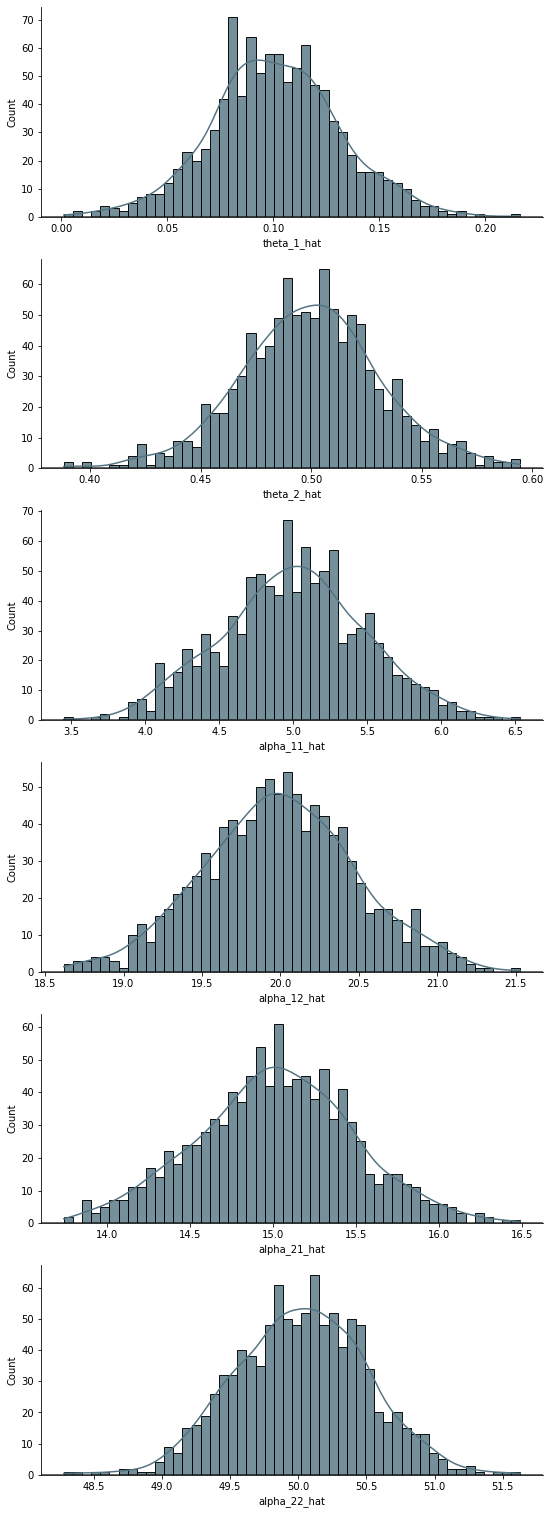

In [7]:
sampling_plot(realizations_n10, colors, bins=50)

In [116]:
def alpha_1(t):
    return np.exp(t/10)
def alpha_2(t):
    return -t/5

In [219]:
params = {'nfeatures': 2,
              'ngroups': 2,
              'specified_ngroups': 2,
              'theta': np.array([0.1, 0.5]),
              'alpha': alpha,
              'theta_0': np.array([0.05, 0.3 ]),
              'alpha_0':alpha,
              'low': -3,
              'up': 3,
              'nreps': 1000,
              'seed': 1}

In [210]:
#looping over a dict
for t in [2, 5, 10, 20]:
    alpha_1t = []
    for x in range(t):
        alpha_1t.append(alpha_1(x+1))
    alpha_2t = []
    for x in range(t):
        alpha_2t.append(alpha_2(t+1))
    alpha =  np.array(alpha_1t + alpha_2t)
    
    for n in [100, 1000, 3000]:
        estimates = pd.DataFrame(monte_carlo_simulation(nindividuals=n, nperiods=t,**params)).

In [212]:
params

{(3000, 20): {'nindividuals': 3000,
  'nfeatures': 2,
  'ngroups': 2,
  'specified_ngroups': 2,
  'nperiods': 20,
  'theta': array([0.1, 0.5]),
  'alpha': array([ 1.10517092,  1.22140276,  1.34985881,  1.4918247 ,  1.64872127,
          1.8221188 ,  2.01375271,  2.22554093,  2.45960311,  2.71828183,
          3.00416602,  3.32011692,  3.66929667,  4.05519997,  4.48168907,
          4.95303242,  5.47394739,  6.04964746,  6.68589444,  7.3890561 ,
         -4.2       , -4.2       , -4.2       , -4.2       , -4.2       ,
         -4.2       , -4.2       , -4.2       , -4.2       , -4.2       ,
         -4.2       , -4.2       , -4.2       , -4.2       , -4.2       ,
         -4.2       , -4.2       , -4.2       , -4.2       , -4.2       ]),
  'theta_0': array([0.05, 0.3 ]),
  'alpha_0': array([ 1.10517092,  1.22140276,  1.34985881,  1.4918247 ,  1.64872127,
          1.8221188 ,  2.01375271,  2.22554093,  2.45960311,  2.71828183,
          3.00416602,  3.32011692,  3.66929667,  4.05519997,

In [153]:
'α̂_it'

'α̂_it'

In [155]:
print(r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!")

$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!


In [169]:
'α̂\N{SUBSCRIPT TWOTWO}'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 20-39: unknown Unicode character name (<ipython-input-169-f0e3b14a1114>, line 1)

In [ ]:
realizations = pd.DataFrame(estimates_n10,  columns = ['t', 'theta_2_hat', 'alpha_11_hat', 'alpha_12_hat', 
                                                                  'alpha_21_hat', 'alpha_22_hat'])

'θ_k'

In [133]:
for n in [100, 1000, 3000]:
    for t in [1,2]:
        print(str(t))

SyntaxError: invalid syntax (<ipython-input-133-75b639a06b7f>, line 3)

In [128]:
'realizations_n',str(1),sep = ''

SyntaxError: cannot assign to literal (<ipython-input-128-1d2f289445de>, line 1)

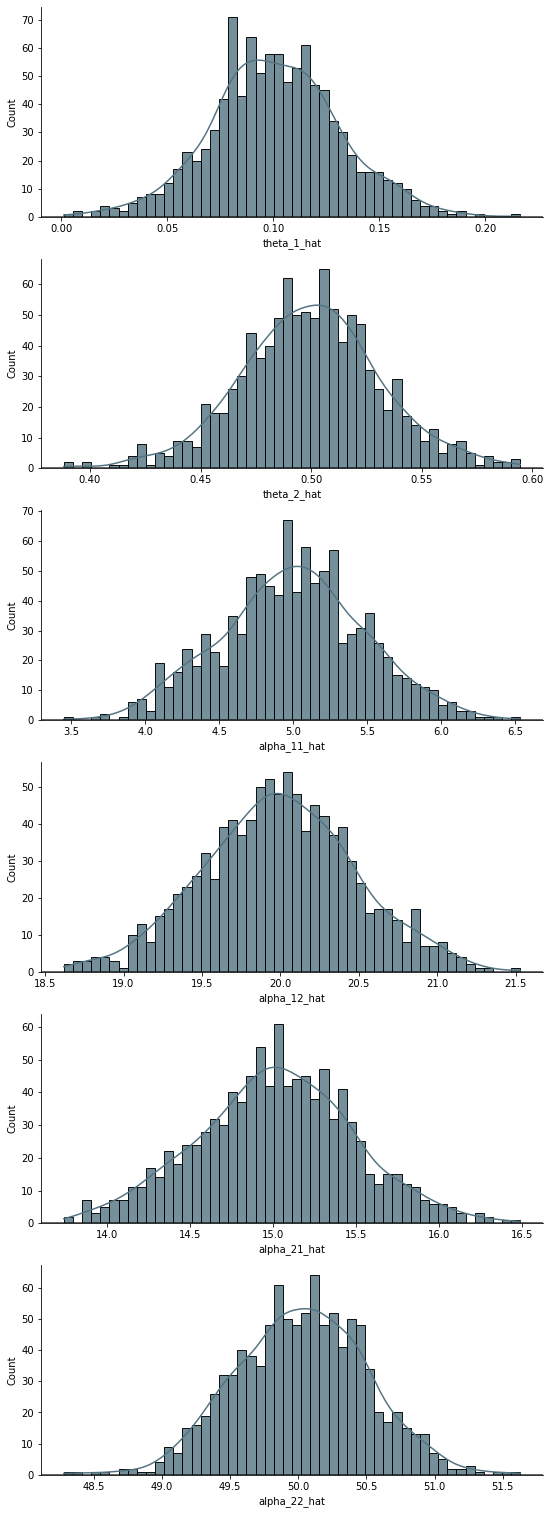

In [7]:
sampling_plot(realizations_n10, colors, bins=50)
#plt.savefig("sampling_plot_n10", dpi=250)

In [ ]:
def save_figures(x):
    fig = x.get_figure()
    fig.savefig('x.png', dpi=250)

In [8]:
expected_value_n10 = realizations_n10.mean(axis=0)
expected_value_n10

theta_1_hat      0.101051
theta_2_hat      0.499709
alpha_11_hat     4.999660
alpha_12_hat    19.993460
alpha_21_hat    15.016048
alpha_22_hat    50.021782
dtype: float64

In [9]:
variance_n10 = ((realizations_n10 - expected_value_n10)**2).sum(axis=0) / (1000 - 1)
variance_n10

theta_1_hat     0.000936
theta_2_hat     0.001016
alpha_11_hat    0.234892
alpha_12_hat    0.235984
alpha_21_hat    0.220804
alpha_22_hat    0.232239
dtype: float64

In [ ]:
expected_value_n100 = estimates_n100.mean(axis=0)
expected_value_n100

In [ ]:
variance_n100 = ((estimates_n100 - expected_value_n100)**2).sum(axis=0) / (1000 - 1)
variance_n100

In [ ]:
expected_value_n1000 = estimates_n1000.mean(axis=0)
expected_value_n1000

In [ ]:
variance_n1000 = ((estimates_n1000 - expected_value_n1000)**2).sum(axis=0) / (1000 - 1)
variance_n1000

In [ ]:
expected_value_n10000 = estimates_n10000.mean(axis=0)
expected_value_n10000

In [ ]:
variance_n10000 = ((estimates_n10000 - expected_value_n10000)**2).sum(axis=0) / (1000 - 1)
variance_n10000

In [ ]:
realizations_n10 = pd.DataFrame(estimates_n10,  columns = ['theta_1_hat', 'theta_2_hat', 'alpha_11_hat', 'alpha_12_hat', 
                                                                  'alpha_21_hat', 'alpha_22_hat'])

In [222]:
estimates_n100 = pd.DataFrame(monte_carlo_simulation(**params_n["n=100"]),  columns = ['theta_1_hat', 'theta_2_hat', 'alpha_11_hat', 'alpha_12_hat', 
                                                                  'alpha_21_hat', 'alpha_22_hat'])

LinAlgError: Singular matrix

In [ ]:
sampling_plot(estimates_n100, colors)

In [ ]:
estimates_n1000 = pd.DataFrame(monte_carlo_simulation(**params_n["n=1000"]), columns = ['theta_1_hat', 'theta_2_hat', 'alpha_11_hat', 'alpha_12_hat', 
                                                                  'alpha_21_hat', 'alpha_22_hat'])

In [ ]:
sampling_plot(estimates_n1000, colors, fig_width=10, fig_height=50, bins=35,alpha=0.6)

In [ ]:
%%timeit
estimates_n10000 = pd.DataFrame(monte_carlo_simulation(**params["n=10000"]), columns = ['theta_1_hat', 'theta_2_hat', 'alpha_11_hat', 'alpha_12_hat', 
                                                                  'alpha_21_hat', 'alpha_22_hat'])

In [ ]:
%%timeit
sampling_plot(estimates_n10000, colors[2:4])

# Simulation Strategy for increasing T

$y_{it} = x_{it}'\theta + \alpha_{g_it} + \upsilon_{it}$


with g=1,G=2 distict group structure for independent individuals i= 1,...,N=1000 over time t=1,...,T=4,5,6,7

- simulate p=2 independent covariates $x_{itp} \sim Unif(0,30) $ 
- simulate $\upsilon_{it} \sim \mathcal{N}(0, \sigma^2)$

with parameters:
- $ \alpha_1 = t/10$

- $ \alpha_2 = e^{t/200}$


- $ \theta = \begin{pmatrix} 0.1 \\ 0.5 \end{pmatrix}$

In [1]:
def alpha_1(t):
    return t/10

In [2]:
def alpha_2(t):
    return np.exp(t/200)

In [3]:
alpha_1t = []
for t in range(900):
    alpha_1t.append(alpha_1(t+1))

In [6]:
alpha_2t = []
for t in range(900):
    alpha_2t.append(alpha_2(t+1))

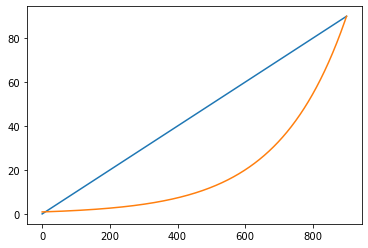

In [7]:
plt.plot(np.array(alpha_1t))
plt.plot(np.array(alpha_2t))

In [12]:
params_t = {"t=10": {"nindividuals" : 1000,
                   "nfeatures" : 2,
                   "ngroups" : 2,
                   "nperiods" : 10,
                   "theta" : np.array([0.1, 0.5]),
                   "alpha" : np.array(alpha_1t[:10] + alpha_2t[:10]),
                   "theta_0" : np.array([0.05,0.3]),
                   "alpha_0" : np.array(alpha_1t[:10] + alpha_2t[:10]),
                   "low" : -15,
                   "up" : 15,
                   "nreps" : 1000,
                   "seed" : 1},
          
          "t=100": {"nindividuals" : 1000,
                    "nfeatures" : 2,
                    "ngroups" : 2,
                    "specified_ngroups" : 2,
                    "nperiods" : 100,
                    "theta" : np.array([0.1,0.5]),
                    "alpha" : np.array(alpha_1t[:100] + alpha_2t[:100]),
                    "theta_0" : np.array([0.05,0.3]),
                    "alpha_0" : np.array(alpha_1t[:100] + alpha_2t[:100]),
                    "low" : 0,
                    "up" : 15,
                    "nreps" : 1000,
                    "seed" : 1},
          
          "t=500": {"nindividuals" : 1000,
                     "nfeatures" : 2,
                     "ngroups" : 2,
                     "nperiods" : 500,
                     "theta" : np.array([0.1,0.5]),
                     "alpha" : np.array(alpha_1t[:500] + alpha_2t[:500]),
                    "theta_0" : np.array([0.05,0.3]),
                    "alpha_0" : np.array(alpha_1t[:10] + alpha_2t[:10]),
                     "low" : -15,
                     "up" : 15,
                     "nreps" : 1000,
                     "seed" : 1},
          
        "t=900": {"nindividuals" : 1000,
                    "nfeatures" : 2,
                    "ngroups" : 2,
                    "nperiods" : 900,
                    "theta" : np.array([0.1,0.5]),
                    "alpha" : np.array(alpha_1t + alpha_2t),
                    "theta_0" : np.array([0.05,0.3]),
                    "alpha_0" : np.array(alpha_1t[:10] + alpha_2t[:10]),
                    "low" : -15,
                    "up" : 15,
                    "nreps" : 1000,
                    "seed" : 1}}

In [13]:
estimates_g1 = monte_carlo_simulation(**params_t["t=100"])

In [16]:
alpha = np.array(alpha_1t + alpha_2t)
alpha

array([ 0.1       ,  0.2       ,  0.3       , ..., 89.12144588,
       89.56816899, 90.0171313 ])

In [17]:
alpha_0 = np.array(alpha_1t[:10] + alpha_2t[:10])
theta_0 = np.array([0.1, 0.5])
ngroups = 2

In [ ]:
alpha_0

In [ ]:
group_error = np.empty((y.size,2))
for g in range(2):
    group_error[:,g] = np.square(y - X@theta_0 - 
                                 np.tile(alpha_0[g*10:(g+1)*10],1000))

In [ ]:
np.tile(alpha_0[0*10:(0+1)*10],1000)[10:20]

In [ ]:
group_error

In [ ]:
group_assignment = np.argmin(group_error, axis =1) #np.argmin returns the indices of the minimum values along an axis.

In [ ]:
group_assignment[0:20]

In [ ]:
dummy = np.zeros(((10000),(20)))
column = 0
for g in range(2):
    group = 1 * (group_assignment == g)
    for t in range(10):
        time_dummy = np.zeros(10)
        time_dummy[t] = 1
        time_dummy = np.tile(time_dummy, 1000).astype(int)
        dummy[:,(column)] = group * time_dummy
        column += 1 
        if column == 20:
            break

In [ ]:
dummy[:1,] == dummy_original[:1,]

In [ ]:
group_assignment

In [ ]:
dummy_original = np.tile(np.identity(20), int(500)).T

In [1]:
np.array(alpha_1t + alpha_2t + [1.2, 1.5, 2.2, 3, 3.6])

NameError: name 'np' is not defined

In [18]:
estimates_t10 = monte_carlo_simulation(**params_t["t=10"])

In [19]:
realizations_t10 = pd.DataFrame(estimates_t10)

In [21]:
realizations_t10.mean()

0     0.100046
1     0.500033
2    -0.006427
3     0.103740
4     0.214537
5     0.326235
6     0.443298
7     0.548905
8     0.660236
9     0.771370
10    0.884325
11    0.993454
12    1.114034
13    1.106080
14    1.103620
15    1.093878
16    1.085285
17    1.084638
18    1.075176
19    1.068389
20    1.065278
21    1.061813
dtype: float64

In [25]:
help(sampling_plot)

Help on function sampling_plot in module simulation_plot:

sampling_plot(realizations, colors, fig_width=9, fig_height=27, bins=30, alpha=0.8)
    Creating multiple plots for the distribution of coefficient realizations.
    in one figure for a given data frame, titles and colors have to be defined
    before using the function
    Args:
        data_set (pandas.DataFrame): 
        fig_width (int, optional): Define figure width. Defaults to 20.
        fig_height (int, optional): Define figure height. Defaults to 40.



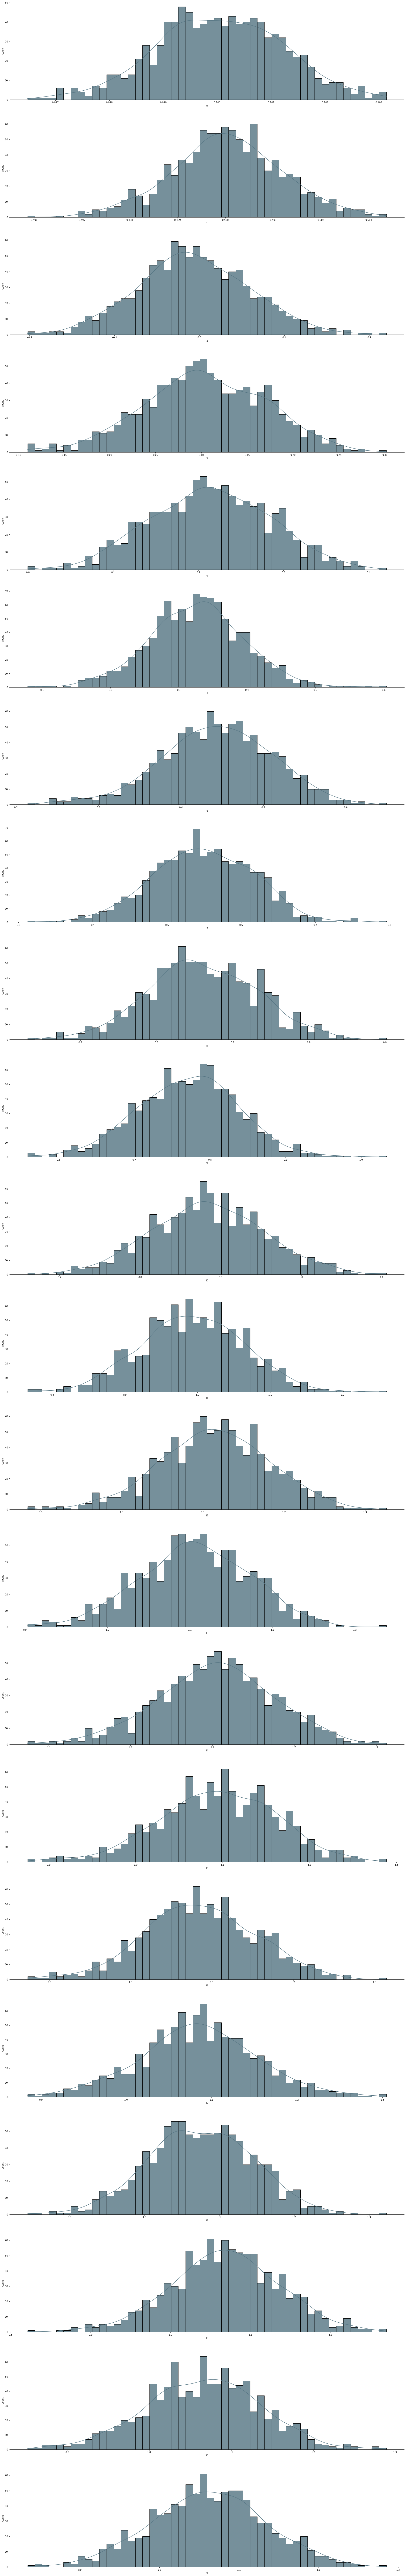

In [28]:
sampling_plot(realizations_t10, colors, bins=50, fig_width= 30,fig_height=200)

In [30]:
g3 = {"nindividuals" : 100,
      "nfeatures" : 2,
      "ngroups" : 3,
      "nperiods" : 2,
      "theta" : np.array([0.1,0.5]),
      "alpha" : np.array([0.5, 1, 2, 4, 3, 7]),
      "theta_0" : np.array([0.05,0.3]),
      "alpha_0" : np.array([0.5, 1, 2, 4, 3, 7]),
      "low" : -15,
      "up" : 15,
      "nreps" : 100,
      "seed" : 6}

In [31]:
estimates_g3 = monte_carlo_simulation(**g3)

In [32]:
realizations_g3 = pd.DataFrame(estimates_g3)

In [22]:
np.array(alpha_1t[:10] + alpha_2t[:10])

array([0.1       , 0.2       , 0.3       , 0.4       , 0.5       ,
       0.6       , 0.7       , 0.8       , 0.9       , 1.        ,
       1.00501252, 1.01005017, 1.01511306, 1.02020134, 1.02531512,
       1.03045453, 1.03561971, 1.04081077, 1.04602786, 1.0512711 ])

In [ ]:
np.tile(np.identity(2*10), int(1000/2)).T

In [ ]:
np.identity(2*10)

In [9]:
to_simulate = {"nindividuals" : 1000,
                   "nfeatures" : 2,
                   "ngroups" : 2,
                   "nperiods" : 10,
                   "theta" : np.array([0.1, 0.5]),
                   "alpha" : np.array(alpha_1t[:10] + alpha_2t[:10]),
                   "low" : -15,
                   "up" : 15}

In [10]:
y, X = simulate(**to_simulate)

In [ ]:
y.size

In [ ]:
X.size

In [ ]:
help(estimate_grouped_fixed_effect_model_parameters)

In [ ]:
estimate_grouped_fixed_effect_model_parameters(outcome=y, X=X, ngroups=2, nfeatures=2, nperiods=10, nindividuals=1000,
                                              alpha_0 = np.array(alpha_1t[:10] + alpha_2t[:10]), theta_0 = np.array([0.1, 0.5]))

In [ ]:
np.tile(alpha_0[g*nperiods:(g+1)*nperiods],nindividuals))